In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
import statsmodels.api as sm
import re
import ast

In [3]:
path: str = './data/'
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_sec_structure.csv"))

seperate cell and lysate data --> lysate hat mehr daten und alle spezies --> besser

In [12]:
# Filter rows where 'text' column contains the word 'specific'
prokaryotes_lysate_NaN = prokaryotes[prokaryotes['run_name'].str.contains('lysate', case=True)]

# Filter rows where 'text' column does not contain the word 'specific'
prokaryotes_cells_NaN = prokaryotes[prokaryotes['run_name'].str.contains('cells', case=True)]

print(prokaryotes_cells_NaN['run_name'].unique())
print(prokaryotes_lysate_NaN['run_name'].unique())

prokaryotes_lysate = prokaryotes_lysate_NaN.dropna(subset=['meltPoint'])
prokaryotes_cells = prokaryotes_cells_NaN.dropna(subset=['meltPoint'])

['Escherichia coli cells' 'Thermus thermophilus HB27 cells']
['Geobacillus stearothermophilus NCA26 lysate'
 'Bacillus subtilis_168_lysate_R1' 'Escherichia coli lysate'
 'Oleispira antarctica_RB-8_lysate_R1' 'Thermus thermophilus HB27 lysate'
 'Picrophilus torridus DSM9790 lysate']


psipred prediction accuracy

In [171]:
secs = ['Helix1','Turn1','Sheet1','Helix2','Coil2','Sheet2']
for p in range(len(prokaryotes)):
    for s in secs:
        if pd.isnull(prokaryotes.at[p, s]) == False:    	
            prokaryotes.at[p, s] = ast.literal_eval(prokaryotes.at[p, s])

In [172]:
#calculates the relative and mean error of the psipred prediction against the crystallography structure

secs = ['Helix1','Turn1','Sheet1','Helix2','Coil2','Sheet2']

secs1=['Helix1', 'Turn1', 'Sheet1']
secs2=['Helix2', 'Coil2', 'Sheet2']

helix_fehler = []
sheet_fehler = []

for n in range(len(prokaryotes)):
        if isinstance(prokaryotes.at[n, 'Helix1'], list)  and isinstance(prokaryotes.at[n, 'Sheet1'], list):
            if len(prokaryotes.at[n, 'Helix2']) != 0  and len(prokaryotes.at[n, 'Sheet2']) != 0:
                if len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']) == 0:
                    helix_fehler.append(0)
                else:
                    helix_fehler.append(abs((len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']))/len(prokaryotes.at[n, 'Helix2'])))
                if len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']) == 0:
                    sheet_fehler.append(0)
                else: 
                    sheet_fehler.append(abs((len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']))/len(prokaryotes.at[n, 'Sheet2'])))


helix_fehler_m = sum(helix_fehler)/len(helix_fehler)
print(helix_fehler_m)
sheet_fehler_m = sum(sheet_fehler)/len(sheet_fehler)
print(sheet_fehler_m)




0.3064069239992194
0.3664769629350773


In [173]:
secs = ['Helix1','Turn1','Sheet1','Helix2','Coil2','Sheet2']

secs1=['Helix1', 'Turn1', 'Sheet1']
secs2=['Helix2', 'Coil2', 'Sheet2']

helix_fehler = []
sheet_fehler = []

for n in range(len(prokaryotes)):
        if isinstance(prokaryotes.at[n, 'Helix1'], list)  and isinstance(prokaryotes.at[n, 'Sheet1'], list):
            if len(prokaryotes.at[n, 'Helix2']) != 0:
                if len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']) == 0:
                    helix_fehler.append(0)
                else:
                    helix_fehler.append(abs((len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']))/len(prokaryotes.at[n, 'Helix2'])))
            if len(prokaryotes.at[n, 'Sheet2']) != 0:
                if len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']) == 0:
                    sheet_fehler.append(0)
                else: 
                    sheet_fehler.append(abs((len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']))/len(prokaryotes.at[n, 'Sheet2'])))


helix_fehler_m = sum(helix_fehler)/len(helix_fehler)
print(helix_fehler_m)
sheet_fehler_m = sum(sheet_fehler)/len(sheet_fehler)
print(sheet_fehler_m)

0.30401103140438984
0.3661931651651261


use tobis function for secondary structure and compare its accuracy to crystallography

In [174]:
#use the function to calculate the amount of helices, sheets and turns
from function import univt3
from function import univt2

tobisfunction = []

for n in range(len(prokaryotes)):
    tobisfunction.append(univt3(prokaryotes.loc[n, 'Sequence']))

#now compare the function to the crystallography data

helix_f_tobi = []
sheet_f_tobi = []

for n in range(len(prokaryotes)):
        if isinstance(prokaryotes.at[n, 'Helix1'], list)  and isinstance(prokaryotes.at[n, 'Sheet1'], list):
            if tobisfunction[n][0] != 0:
                if tobisfunction[n][0]-len(prokaryotes.at[n, 'Helix1']) == 0:
                    helix_f_tobi.append(0)
                else:
                    helix_f_tobi.append(abs((tobisfunction[n][0]-len(prokaryotes.at[n, 'Helix1']))/tobisfunction[n][0]))
            if tobisfunction[n][1] != 0:
                if tobisfunction[n][0]-len(prokaryotes.at[n, 'Sheet1']) == 0:
                    sheet_f_tobi.append(0)
                else: 
                    sheet_f_tobi.append(abs((tobisfunction[n][1]-len(prokaryotes.at[n, 'Sheet1']))/tobisfunction[n][1]))


helix_fehler_tobi_m = sum(helix_f_tobi)/len(helix_f_tobi)
print(helix_fehler_tobi_m)
sheet_fehler_tobi_m = sum(sheet_f_tobi)/len(sheet_f_tobi)
print(sheet_fehler_tobi_m)

0.31835084180714907
0.36423319058731934


maxi macht marik sachen - append salt bridge data to prokaryotes and calculate correlation

In [175]:
from function import salt_bridge
path = './data/pdbs'
Salt_bridges = salt_bridge(path)


In [160]:
# here I calculate the amount of brdiges as well as the sum of the bridge distances within the saltbridge dictionary
test = Salt_bridges['P10943']
print(test)

print(sum(Salt_bridges['P10943'].shape))

n = 3
amount_bridges = {}

for n, k in Salt_bridges.items():
    amount_bridges[n] = np.sum(~np.isnan(k)) - sum(Salt_bridges[n].shape) +2

print(amount_bridges)

sum_bridges = {}
    
for n, k in Salt_bridges.items():
    sum_bridges[n] = np.nansum(k) - np.nansum(Salt_bridges[n][0,:]) - np.nansum(Salt_bridges[n][:,0])

print(sum_bridges)





[[         nan  60.         390.         458.         835.
  836.        ]
 [366.                  nan   2.75298928          nan          nan
           nan]
 [430.                  nan          nan   2.69241267          nan
           nan]
 [551.                  nan          nan          nan   2.97577435
    2.84695592]
 [552.                  nan          nan          nan   2.74490601
           nan]
 [891.           3.02476462          nan          nan          nan
           nan]
 [918.                  nan          nan          nan          nan
    3.26206131]]
13
2579.0
{'P10943': 7, 'R4YQY5': 6, 'R4YS35': 27, 'R4YQ82': 28, 'R4YR35': 13, 'Q72GG0': 52, 'Q6L2L6': 21, 'O32293': 9, 'R4YUW3': 19, 'Q6L0G1': 16, 'P37330': 90, 'R4YM62': 2, 'P94525': 15, 'O34325': 25, 'O34474': 6, 'Q6L159': 27, 'O07585': 23, 'R4YJR4': 42, 'R4YMW5': 16, 'P94425': 19, 'R4YL62': 16, 'Q72IF5': 25, 'R4YKR4': 19, 'O31639': 11, 'P39765': 21, 'Q72LH3': 14, 'Q72KM2': 30, 'O35043': 17, 'R4YJF6': 75, 'P52998': 38, 

In [184]:
for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False:
        if prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in amount_bridges:
            prokaryotes.loc[n, 'A_Salty'] = amount_bridges[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]

for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False:
        if prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in sum_bridges:
            prokaryotes.loc[n, 'S_Salty'] = sum_bridges[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]

In [198]:
#calculate mean salt bridge length per protein and append it to the df
M_Salty = []

for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n, 'S_Salty']) == False and pd.isnull(prokaryotes.loc[n, 'A_Salty']) == False and prokaryotes.loc[n, 'S_Salty'] !=0 and prokaryotes.loc[n, 'A_Salty'] !=0:
        M_Salty = (prokaryotes.loc[n, 'S_Salty']/prokaryotes.loc[n, 'A_Salty'])
        prokaryotes.loc[n, 'M_Salty'] = M_Salty
    elif pd.isnull(prokaryotes.loc[n, 'S_Salty']) == True:
       prokaryotes.loc[n, 'M_Salty'] = np.nan
    elif pd.isnull(prokaryotes.loc[n, 'A_Salty']) == True:
        prokaryotes.loc[n, 'M_Salty'] = np.nan
    elif prokaryotes.loc[n, 'S_Salty'] ==0:
        prokaryotes.loc[n, 'M_Salty'] = np.nan
    elif prokaryotes.loc[n, 'A_Salty'] ==0:
        prokaryotes.loc[n, 'M_Salty'] = np.nan





correltaion between sum and amount of salt bridges to Tm

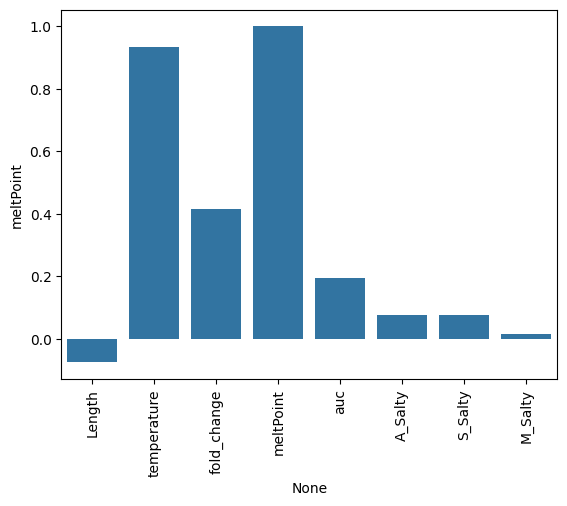

In [206]:

prokaryotes_salt_NaN = prokaryotes.dropna(subset='meltPoint')

prok_s_corr = prokaryotes_salt_NaN.corr('pearson', numeric_only=True)

sns.barplot(data= prok_s_corr, y= 'meltPoint', x = prok_s_corr.columns)
plt.xticks(rotation = 90)
plt.show()

Hydrophobic patches - integration

In [1]:
from function import VdW_interaction
VdW_clus, VdW_vol = VdW_interaction('./data/pdbs')